In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
import datetime
from sklearn.ensemble import RandomForestClassifier
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from xgboost import XGBClassifier


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Loan_Data.csv to Loan_Data.csv


In [ ]:
df = pd.read_csv("Loan_Data.csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape


(614, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## data cleaning

In [ ]:
#CHECKING consistency of the dataset
df.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
 #finding the number of missing values
 df.isna().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#Here we will fill the null values of the variables LoanAmount and Loan_Amount_Term with the Mean¶
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [ ]:
#filling categorical data with the mode
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])


In [ ]:
#deleting the id since it doesnt tell much info
df.drop(columns="Loan_ID", inplace=True)


In [ ]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y


<ipython-input-13-7ee8cfa8876b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)


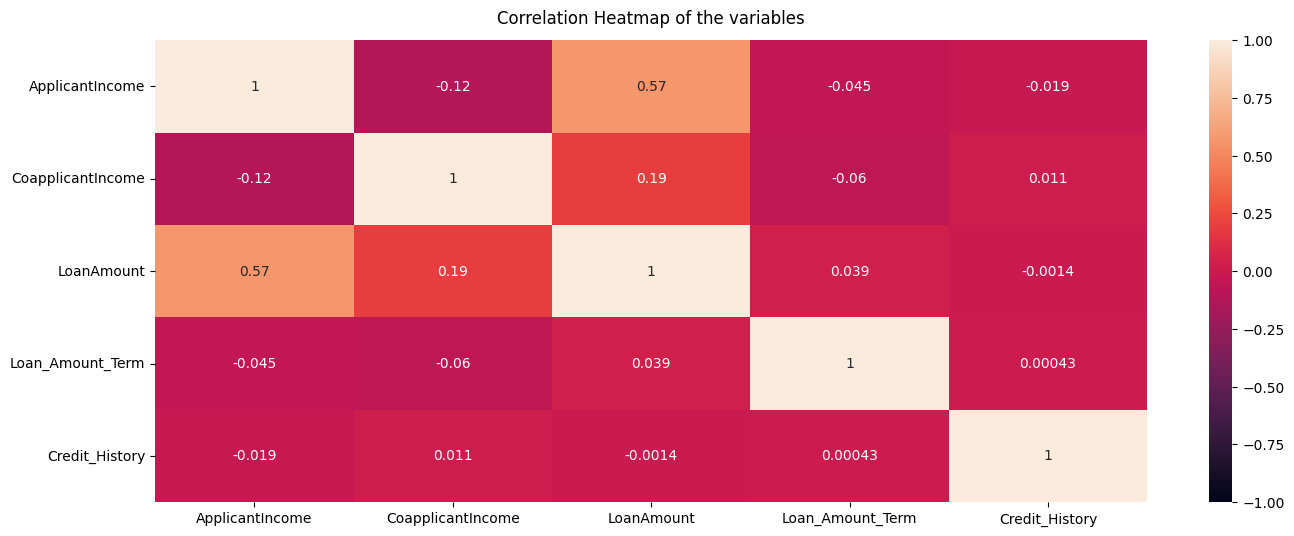

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap of the variables', fontdict={'fontsize':12}, pad=12);

<Axes: xlabel='Credit_History', ylabel='count'>

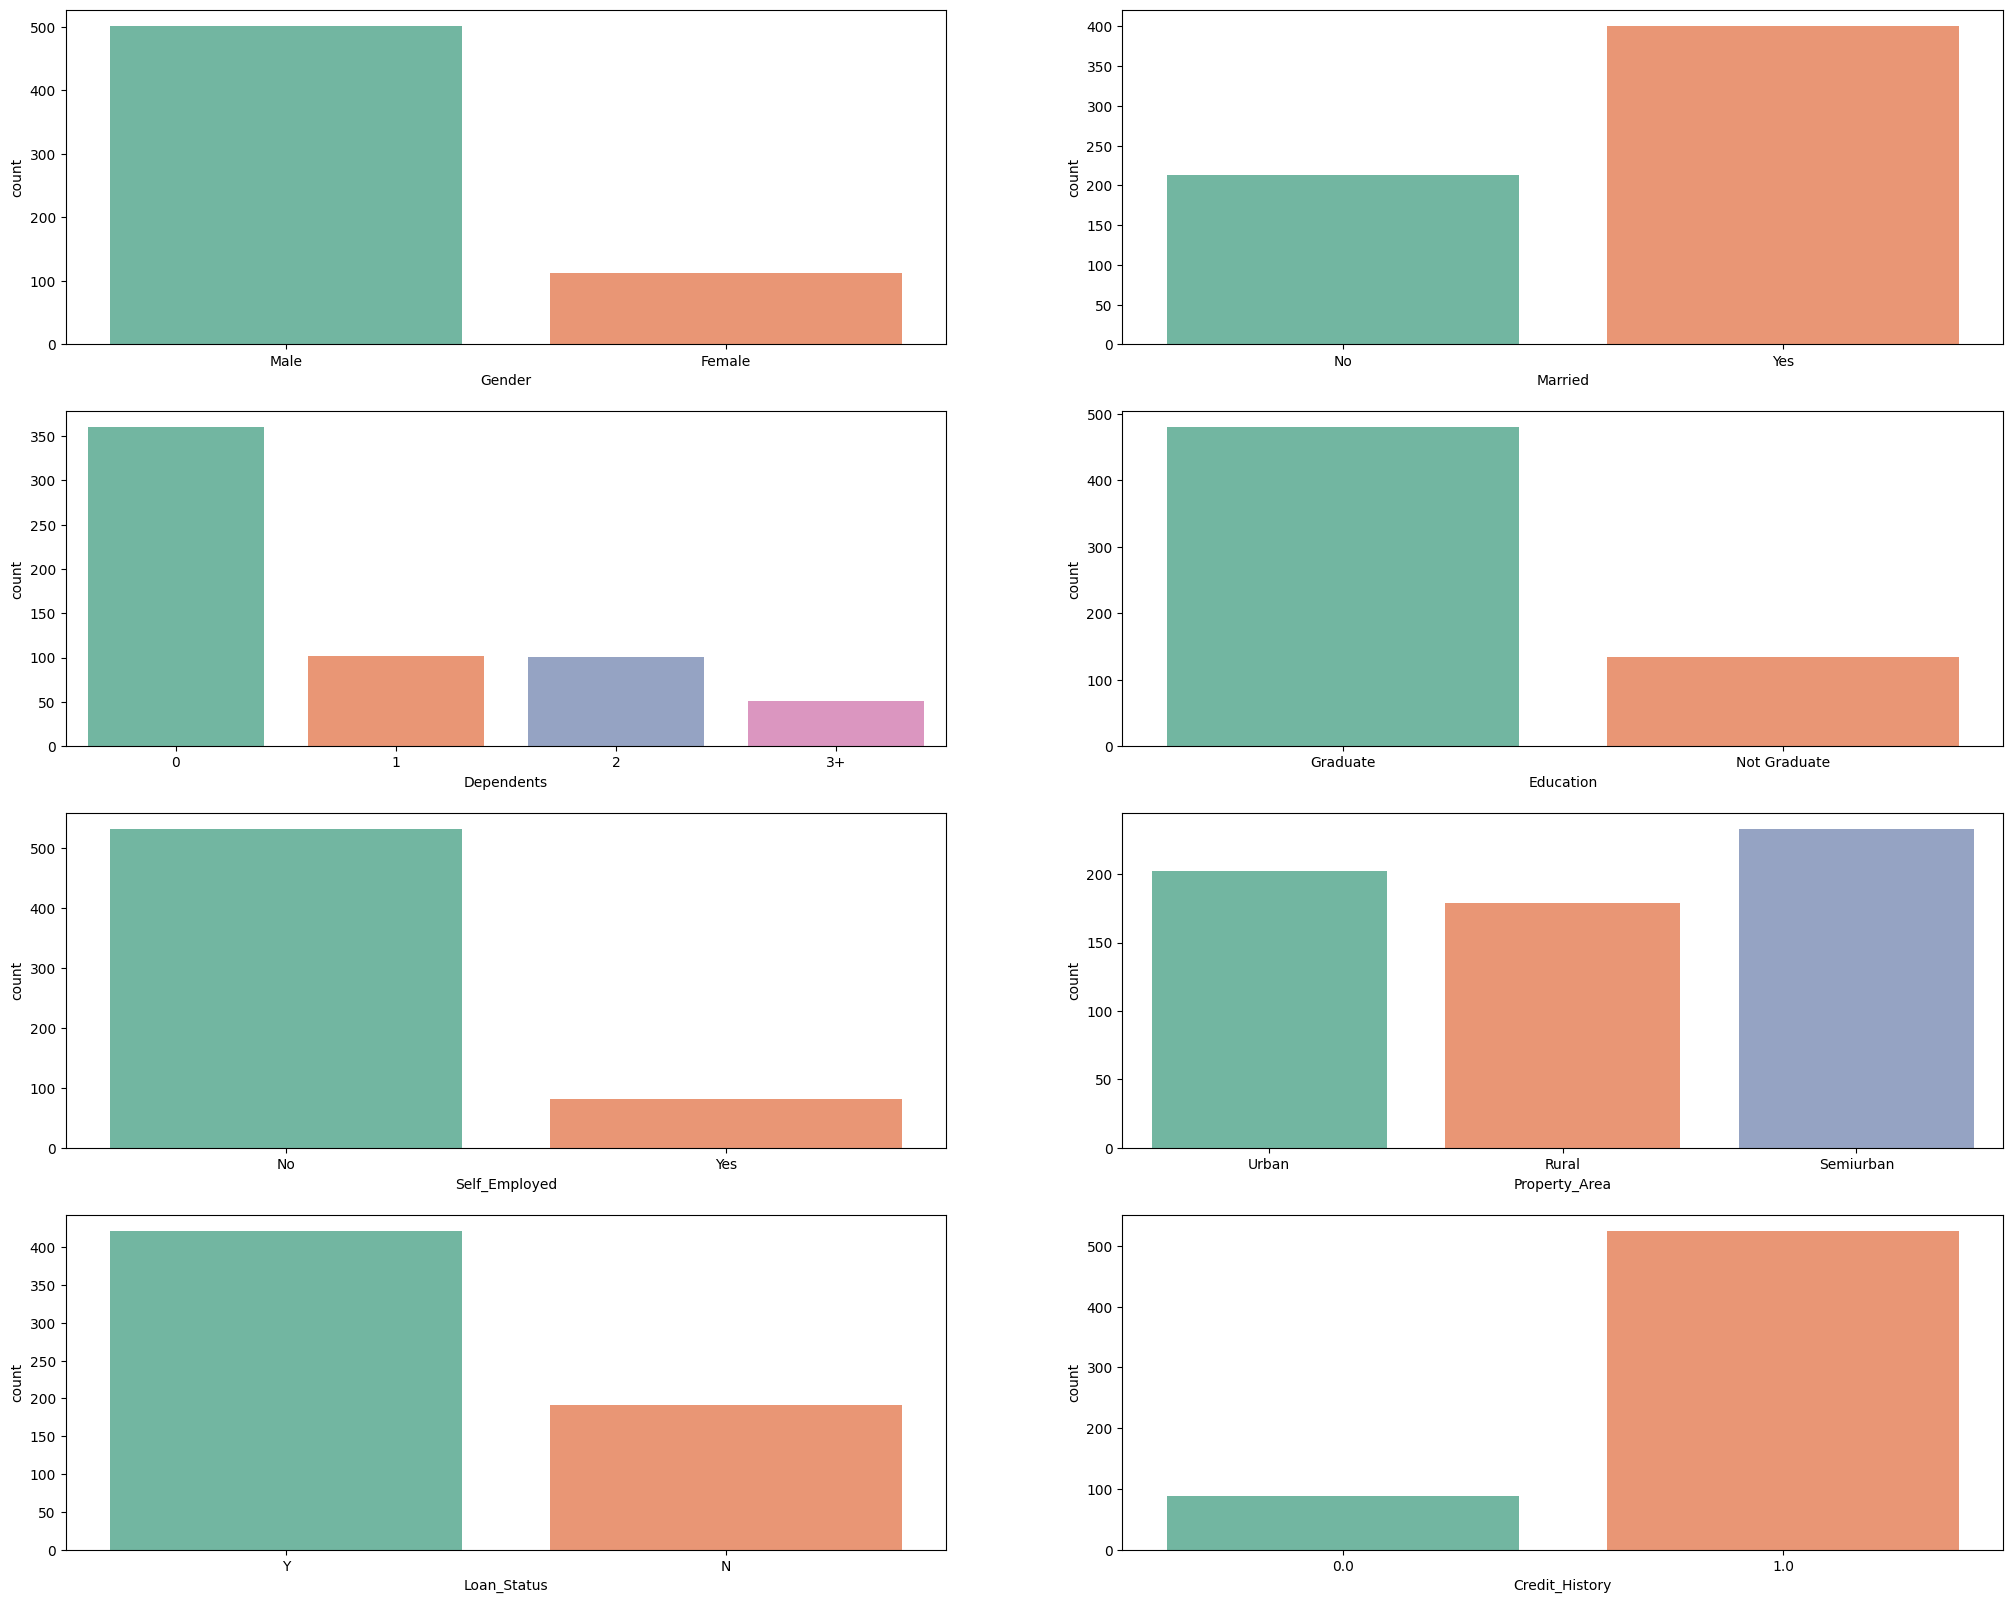

In [ ]:
plt.figure(figsize = (25,20))

plt.subplot(4,2,1)
sns.countplot(x = 'Gender', palette = 'Set2', data = df)

plt.subplot(4,2,2)
sns.countplot(x = 'Married', palette = 'Set2', data = df)

plt.subplot(4,2,3)
sns.countplot(x = 'Dependents', palette = 'Set2', data = df)

plt.subplot(4,2,4)

sns.countplot(x = 'Education', palette = 'Set2', data = df)

plt.subplot(4,2,5)
sns.countplot(x = 'Self_Employed', palette = 'Set2', data = df)

plt.subplot(4,2,6)
sns.countplot(x = 'Property_Area', palette = 'Set2', data = df)

plt.subplot(4,2,7)
sns.countplot(x = 'Loan_Status', palette = 'Set2', data = df)

plt.subplot(4,2,8)
sns.countplot(x = 'Credit_History', palette = 'Set2', data = df)


<Axes: xlabel='ApplicantIncome'>

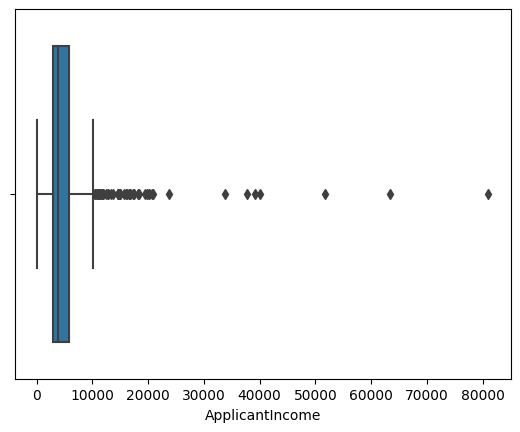

In [ ]:
#detecting outliers
sns.boxplot(x=df["ApplicantIncome"])


In [ ]:
print(df['ApplicantIncome'].quantile(0.10))
print(df['ApplicantIncome'].quantile(0.90))



2216.1
9459.900000000007


In [ ]:
df["ApplicantIncome"] = np.where(df["ApplicantIncome"] <2216.1, 2216.1,df['ApplicantIncome'])
df["ApplicantIncome"] = np.where(df["ApplicantIncome"] >9459.90000, 9459.90000,df['ApplicantIncome'])
print(df['ApplicantIncome'].skew())


1.0177280847006949


<Axes: xlabel='ApplicantIncome'>

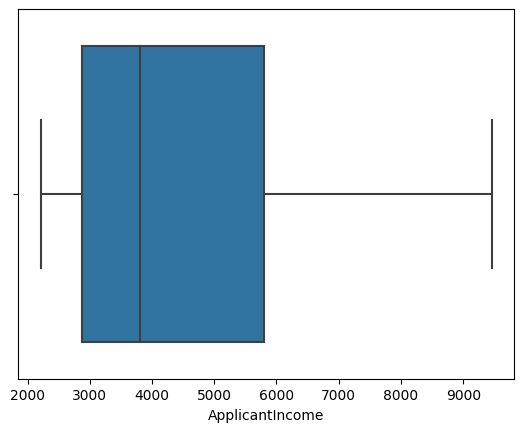

In [ ]:
#confirming no  outliers
sns.boxplot(x=df["ApplicantIncome"])


In [ ]:
#Descriptive statistics
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,4599.164495,1621.245798,146.412162,342.000000,0.855049
std,2281.072440,2926.248369,84.037468,64.372489,0.352339
min,2216.100000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,9459.900000,41667.000000,700.000000,480.000000,1.000000


# model building

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_Gender = LabelEncoder()
label_encoder_Married = LabelEncoder()
label_encoder_Dependents = LabelEncoder()
label_encoder_Education = LabelEncoder()
label_encoder_Self_Employed = LabelEncoder()
label_encoder_Property_Area = LabelEncoder()
label_encoder_Loan_Status = LabelEncoder()

In [ ]:
X = df.drop('Loan_Status', axis = 1)
X = X.values
y = df['Loan_Status']

In [ ]:
X[:,0] = label_encoder_Gender.fit_transform(X[:,0])
X[:,1] = label_encoder_Married.fit_transform(X[:,1])
X[:,2] = label_encoder_Dependents.fit_transform(X[:,2])
X[:,3] = label_encoder_Education.fit_transform(X[:,3])
X[:,4] = label_encoder_Self_Employed.fit_transform(X[:,4])
X[:,10] = label_encoder_Property_Area.fit_transform(X[:,10])
y = label_encoder_Loan_Status.fit_transform(y)

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

Transforming Data into Train e Test, here we will use 30% of our data to test the machine learning models


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)
X_train.shape, y_train.shape


((429, 11), (429,))

In [ ]:
X_test.shape, y_test.shape


((185, 11), (185,))

**logistic regression**

In [ ]:
logistic = LogisticRegression()

In [ ]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logistic.predict(X_test)
print(y_pred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred))
confusion_matrix(y_test,y_pred)


              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185



array([[ 22,  29],
       [  2, 132]])

In [ ]:
from sklearn.metrics import f1_score
evaluation = f1_score(y_test, y_pred)

In [ ]:
evaluation

0.8949152542372881

**Descision tree**

In [ ]:

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
ypred_tree = clf.predict(X_test)
print(ypred_tree)

[0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1
 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0
 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1]


In [ ]:
evaluate_tree = f1_score(y_test, ypred_tree)
evaluate_tree

0.7782101167315176

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred))
confusion_matrix(y_test,y_pred)


              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185



array([[ 22,  29],
       [  2, 132]])

## random forest classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)
#
# Train the mode
forest.fit(X_train, y_train)



RandomForestClassifier(n_estimators=500, random_state=1)

In [ ]:
from sklearn.metrics import accuracy_score


rfpredictions = forest.predict(X_test)
print(accuracy_score(y_test, rfpredictions))

0.7945945945945946


In [ ]:
import numpy as np

importances = forest.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

feat_labels = df.columns[1:]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) Property_Area                  0.258835
 2) Loan_Amount_Term               0.199202
 3) CoapplicantIncome              0.176824
 4) LoanAmount                     0.126797
 5) Education                      0.055758
 6) Loan_Status                    0.053494
 7) Credit_History                 0.036761
 8) Self_Employed                  0.025432
 9) Dependents                     0.025297
10) ApplicantIncome                0.022942
11) Married                        0.018658


In [ ]:
forest.feature_importances_


array([0.01865807, 0.02529651, 0.05575825, 0.02543249, 0.02294209,
       0.17682382, 0.12679708, 0.19920192, 0.03676119, 0.25883484,
       0.05349374])